# Telecom: Identifying Ineffective Operators

## Project Discription

The virtual telephony service CallMeMaybe is developing a new function that will give supervisors information on the least effective operators. An operator is considered ineffective if they have a large number of missed incoming calls (internal and external) and a long waiting time for incoming calls. Moreover, if an operator is supposed to make outgoing calls, a small number of them is also a sign of ineffectiveness.

- Carry out exploratory data analysis
- Identify ineffective operators
- Test statistical hypotheses

### General approche

I will start by looking at the general data, preform a regular EDA and plot graphs after I have a big picture perspective I will define the metrics that make an operator ineffective and write a function that will score the operators according to their efficiency. 
In the end we will test the hypothesis that the more time an operator works the higher they score in the efficiency test.

There is a presentation attached to this project.

Presentation link: https://drive.google.com/file/d/1uAFTz5RF_CDhJXqvrJ6tNt0VS9hU-q2f/view?usp=sharing

In [1]:
# Imports

import math
import pandas as pd
import random
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt
import warnings
import plotly.express as px
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
import datetime
from matplotlib.dates import date2num
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec
from collections import Counter

from matplotlib.dates import date2num
warnings.filterwarnings ("ignore")

%matplotlib inline

## Table of contents

* [1.Importing data](#chapter1)
* [2.Cleaning the data](#chapter2)
   * [Cheking for missing values](#section_2_1)
   * [Checking for dupicates](#section_2_2)
   * [Adding columns Joining data](#section_2_3)
* [3.Studying the general data and plotting graphs](#chapter3)
    * [Daily number of calls](#section_3_1)
    * [Call duration excluding waiting time](#section_3_2)
    * [Waiting time for a call](#section_3_3)
    * [Number of operators and answered vs unanswered calls](#section_3_4)
    * [The proportions of internal calls from all calls](#section_3_5)
    * [The proportions of unanswered calls from internal and external calls](#section_3_6)
    * [Calls by user, average number of calls and average duration](#section_3_7)
    * [Cheking to see if the users plan changes the number of calls, duration, waiting time](#section_3_8)
    * [The average number of calls an operator has in a day](#section_3_9)
* [4.Identifying ineffective metrics](#chapter4)
    * [Cheking for missing values](#section_4_1)
    * [Cheking for missing values](#section_4_2)
    * [Cheking for missing values](#section_4_3)
    * [Cheking for missing values](#section_4_4)
    * [Cheking for missing values](#section_4_5)
* [5.Adding efficiency score columns](#chapter5)
* [6.Testing the hypothesis](#chapter6)
* [7.Conclution](#chapter7)
* [8.Documentation¶](#chapter8)

## 1. Importing data
<a class="anchor" id="chapter1"></a>

In [2]:
local_path1 = '/Users/yoni/Pictures/jupyter/Final Project/Telecom/telecom_clients_us.csv'
local_path2 = '/Users/yoni/Pictures/jupyter/Final Project/Telecom/telecom_dataset_us.csv'

In [3]:
# Importing data with column types
clients = pd.read_csv(local_path1, parse_dates=['date_start'])
dataset = pd.read_csv(local_path2, parse_dates=['date'])

In [4]:
clients.head()

,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16


In [5]:
clients.tail()

,user_id,tariff_plan,date_start
727,166554,B,2019-08-08
728,166911,B,2019-08-23
729,167012,B,2019-08-28
730,166867,B,2019-08-22
731,166565,B,2019-08-08


In [6]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      732 non-null    int64         
 1   tariff_plan  732 non-null    object        
 2   date_start   732 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 17.3+ KB


In [7]:
clients.describe(include='all')

,user_id,tariff_plan,date_start
count,732.000000,732,732
unique,NaN,3,73
top,NaN,C,2019-09-24 00:00:00
freq,NaN,395,24
first,NaN,NaN,2019-08-01 00:00:00
last,NaN,NaN,2019-10-31 00:00:00
mean,167431.927596,NaN,NaN
std,633.810383,NaN,NaN
min,166373.000000,NaN,NaN
25%,166900.750000,NaN,NaN


Clients has 732 users with geristration dates from 2019 08/01-10/31 that is three months.

In [8]:
dataset.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25


In [9]:
dataset.tail()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
53897,168606,2019-11-10 00:00:00+03:00,out,True,957922.0,True,1,0,38
53898,168606,2019-11-11 00:00:00+03:00,out,True,957922.0,False,2,479,501
53899,168606,2019-11-15 00:00:00+03:00,out,True,957922.0,False,4,3130,3190
53900,168606,2019-11-15 00:00:00+03:00,out,True,957922.0,False,4,3130,3190
53901,168606,2019-11-19 00:00:00+03:00,in,False,NaN,True,2,0,64


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype                                
---  ------               --------------  -----                                
 0   user_id              53902 non-null  int64                                
 1   date                 53902 non-null  datetime64[ns, pytz.FixedOffset(180)]
 2   direction            53902 non-null  object                               
 3   internal             53785 non-null  object                               
 4   operator_id          45730 non-null  float64                              
 5   is_missed_call       53902 non-null  bool                                 
 6   calls_count          53902 non-null  int64                                
 7   call_duration        53902 non-null  int64                                
 8   total_call_duration  53902 non-null  int64                                
dtypes: bool

It seems there are Null obgects in two of the columns 'operator_id' and 'internal'

In [11]:
dataset.describe(include='all')

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
count,53902.000000,53902,53902,53785,45730.000000,53902,53902.000000,53902.000000,53902.000000
unique,NaN,119,2,2,NaN,2,NaN,NaN,NaN
top,NaN,2019-11-25 00:00:00+03:00,out,False,NaN,False,NaN,NaN,NaN
freq,NaN,1220,31917,47621,NaN,30334,NaN,NaN,NaN
first,NaN,2019-08-02 00:00:00+03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2019-11-28 00:00:00+03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,167295.344477,NaN,NaN,NaN,916535.993002,NaN,16.451245,866.684427,1157.133297
std,598.883775,NaN,NaN,NaN,21254.123136,NaN,62.917170,3731.791202,4403.468763
min,166377.000000,NaN,NaN,NaN,879896.000000,NaN,1.000000,0.000000,0.000000
25%,166782.000000,NaN,NaN,NaN,900788.000000,NaN,1.000000,0.000000,47.000000


In dataset we have 53902 rows of data from 2019 08/02-11/28 that is allmost 4 months 

## 2. Cleaning the data
<a class="anchor" id="chapter2"></a>

### Cheking for missing values
<a class="anchor" id="section_2_1"></a>

Here i think i see a pattern that i just want to look at. i wounder if there is a corralation between the missing values in the "operator_id" columns and to other columns.

In [12]:
# number of rows with missing value in the operator_id column
x= len(dataset[dataset['operator_id'].isnull()])


y= len(dataset[(dataset['operator_id'].isnull())& (dataset['direction']=='in') & (dataset['internal']==False)& (dataset['is_missed_call']==True)])

y3 = len(dataset[(dataset['direction']=='in') & (dataset['internal']==False)& (dataset['is_missed_call']==True)])

print(
    'Out of the {} missing values in the "operator_id" column:\
    \nIn {:.2%} of them the call was unanswered, was incoming and was internal.\
    \n'.format(
        x,y/x))

Out of the 8172 missing values in the "operator_id" column:    
In 92.22% of them the call was unanswered, was incoming and was internal.    



<span style="background-color:Lavender">**An important note** </span>

<span style="background-color:Lavender">most cases of missing values in the "operator_id" column seem to have a correspondens with three other columns:  'direction', 'internal' and 'is_missed_call'. This is something worth noting in the conclution.</span>

<span style="background-color:Lavender">Back to our missing values:</span>

<span style="background-color:Lavender">In the 'info' method i saw that we have missing values. I will print out the rows with missing values along the rows before and after them. We might have rows with missing values that are just duplictes of the row before or after them.</span>

In [13]:
# Getting the indexes of the missing values
index = (dataset[(dataset['operator_id'].isnull()) | (dataset['internal'].isnull())].index).tolist()

# getting the index before and after each missing value
index_before = [n-1 for n in index if n != 0]
index_after =  [n+1 for n in index]

# adding indexes together 
all_index = index + index_before + index_after
len(all_index)

24695

In [14]:
dataset_missing = dataset[dataset.index.isin(all_index)]
missing_duplicated = dataset_missing[dataset_missing.duplicated(['calls_count','user_id','total_call_duration','date','total_call_duration'],keep=False)]
missing_duplicated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2268 entries, 6 to 53875
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype                                
---  ------               --------------  -----                                
 0   user_id              2268 non-null   int64                                
 1   date                 2268 non-null   datetime64[ns, pytz.FixedOffset(180)]
 2   direction            2268 non-null   object                               
 3   internal             2254 non-null   object                               
 4   operator_id          813 non-null    float64                              
 5   is_missed_call       2268 non-null   bool                                 
 6   calls_count          2268 non-null   int64                                
 7   call_duration        2268 non-null   int64                                
 8   total_call_duration  2268 non-null   int64                                
dtypes: bool(

In [15]:
missing_duplicates = dataset_missing[dataset_missing.duplicated(['user_id',
                            'date','direction','is_missed_call',
                            'calls_count','call_duration','total_call_duration'],keep= False)]
missing_duplicates.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
6,166377,2019-08-05 00:00:00+03:00,out,False,880020.0,True,8,0,50
8,166377,2019-08-05 00:00:00+03:00,out,False,880020.0,True,8,0,50
27,166377,2019-08-12 00:00:00+03:00,in,False,NaN,True,2,0,34
28,166377,2019-08-12 00:00:00+03:00,in,False,NaN,True,2,0,34
38,166377,2019-08-14 00:00:00+03:00,in,False,NaN,True,1,0,3


In [16]:
print('number of rows with missing values in "operator_id": {}'.format(len(dataset[dataset['operator_id'].isnull()])))
print('number of rows with missing values in "internal": {}'.format(len(dataset[dataset['internal'].isnull()])))

number of rows with missing values in "operator_id": 8172
number of rows with missing values in "internal": 117


In [17]:
# duplicates in the dataframe
dup=dataset[dataset.duplicated(keep=False)]

print('Number of duplicate rows that have missing values in them: {}'.format(len(dup[dup['operator_id'].isnull()])))

Number of duplicate rows that have missing values in them: 1432


<span style="background-color:Lavender">
Becouse i have many missing values and many duplicates with missing values, I will first drop the duplicates  give priority and keep the ones without the missing values.</span>

### Checking for dupicates
<a class="anchor" id="section_2_2"></a>

In [18]:
clients[clients.duplicated(['user_id','tariff_plan','date_start'],keep=False)] 

,user_id,tariff_plan,date_start


The clients data has no missing of duplicate data.

In [19]:
duplicated= dataset[dataset.duplicated(['user_id','date','direction','is_missed_call','calls_count','call_duration','total_call_duration'],keep=False)] 
len(duplicated)

10062

In [20]:
# I will sort values by columns with missing values so the missing values will be in the end then drop duplicated

data_clean = dataset.sort_values(by=[
    'internal','operator_id'],na_position='last').drop_duplicates(
    keep='first').sort_index().reset_index(drop=True)

data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49002 entries, 0 to 49001
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype                                
---  ------               --------------  -----                                
 0   user_id              49002 non-null  int64                                
 1   date                 49002 non-null  datetime64[ns, pytz.FixedOffset(180)]
 2   direction            49002 non-null  object                               
 3   internal             48892 non-null  object                               
 4   operator_id          41546 non-null  float64                              
 5   is_missed_call       49002 non-null  bool                                 
 6   calls_count          49002 non-null  int64                                
 7   call_duration        49002 non-null  int64                                
 8   total_call_duration  49002 non-null  int64                                
dtypes: bool

In [21]:

# calculating the % of missing values in the column
missing_internal = len(data_clean[data_clean['internal'].isnull()])
print('% of missing values in internal column: {:.2%}'.format(missing_internal/len(data_clean)))

% of missing values in internal column: 0.22%


<span style="background-color:Lavender">We have 0.22% missing in the "internal" column, that is very low, there is no real way to replace these values so i will drop them.  

In [22]:
data_clean= data_clean.dropna(subset=['internal']).reset_index(drop=True)
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48892 entries, 0 to 48891
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype                                
---  ------               --------------  -----                                
 0   user_id              48892 non-null  int64                                
 1   date                 48892 non-null  datetime64[ns, pytz.FixedOffset(180)]
 2   direction            48892 non-null  object                               
 3   internal             48892 non-null  object                               
 4   operator_id          41491 non-null  float64                              
 5   is_missed_call       48892 non-null  bool                                 
 6   calls_count          48892 non-null  int64                                
 7   call_duration        48892 non-null  int64                                
 8   total_call_duration  48892 non-null  int64                                
dtypes: bool

In [23]:
print('Number of unique users: {}'.format(clients['user_id'].nunique()))
print('Number of users in each tariff plan: \n{}'.format(clients['tariff_plan'].value_counts()))

Number of unique users: 732
Number of users in each tariff plan: 
C    395
B    261
A     76
Name: tariff_plan, dtype: int64


In [24]:
# calculating the % of missing values in the column
missing_operator = len(data_clean[data_clean['operator_id'].isnull()])

print('% of missing values in operator_id column: {:.2%}'.format(missing_operator/len(data_clean)))
print('Number of unique operator_ids: {}'.format(data_clean['operator_id'].nunique()))

% of missing values in operator_id column: 15.14%
Number of unique operator_ids: 1092


<span style="background-color:Lavender">15.14% of data is missing. For now i can continue with the missing values, there is no way to fill those values. I'll see what to do about them later when it will be more relavent.


### Adding columns Joining data
<a class="anchor" id="section_2_3"></a>

In [25]:
# adding a column with day of the week

data_clean['day']= data_clean['date'].dt.dayofweek


# Cleaning the date column
data_clean['date']= data_clean['date'].dt.date


# Merging the two data frammes
data_merge = pd.merge(data_clean,clients,on='user_id',how='left')
data_merge.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,day,tariff_plan,date_start
0,166377,2019-08-04,in,False,NaN,True,2,0,4,6,B,2019-08-01
1,166377,2019-08-05,out,True,880022.0,True,3,0,5,0,B,2019-08-01
2,166377,2019-08-05,out,True,880020.0,True,1,0,1,0,B,2019-08-01
3,166377,2019-08-05,out,True,880020.0,False,1,10,18,0,B,2019-08-01
4,166377,2019-08-05,out,False,880022.0,True,3,0,25,0,B,2019-08-01


## 3. Studying the general data and plotting graphs
<a class="anchor" id="chapter3"></a>

In [26]:
# total number of calls
print('Total number of calls: {}'.format(data_merge['calls_count'].sum()))

# Number of users
print('Total number of users: {}'.format(data_merge['user_id'].nunique()))

Total number of calls: 806484
Total number of users: 307


In [27]:
data_merge_grouped = data_merge.groupby(['date','day'],as_index=False)['calls_count'].sum()

data_merge_grouped.head()

,date,day,calls_count
0,2019-08-02,4,21
1,2019-08-03,5,29
2,2019-08-04,6,6
3,2019-08-05,0,192
4,2019-08-06,1,229


### Daily number of calls
<a class="anchor" id="section_3_1"></a>

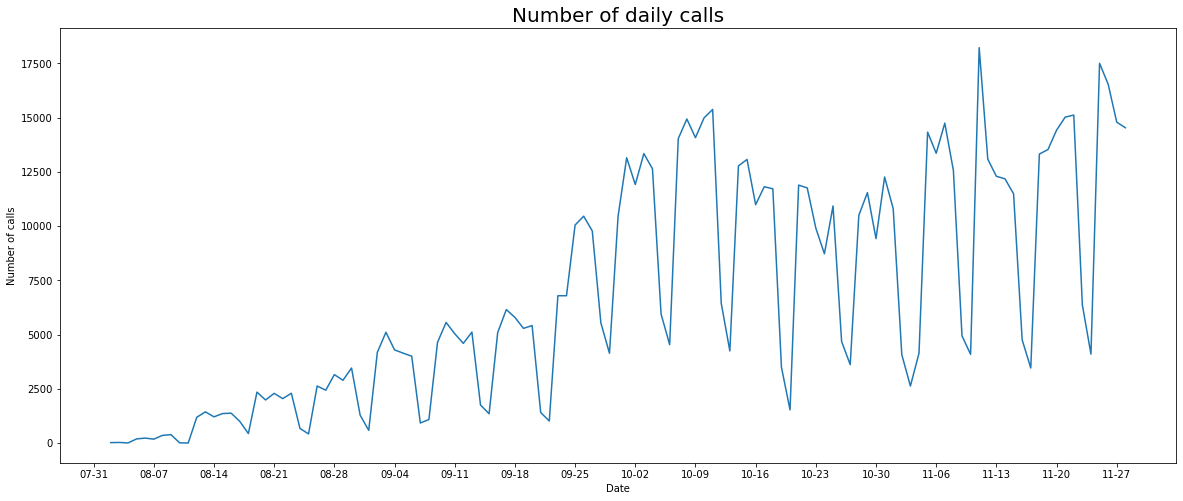

In [28]:
# Plotting the daily number of calls

fig, ax = plt.subplots(figsize=(20,8))
ax.plot('date', 'calls_count', data=data_merge_grouped)

plt.title('Number of daily calls', fontsize = 20)
plt.xlabel('Date')
plt.ylabel('Number of calls')

fmt_half_year = mdates.DayLocator(interval=7)
ax.xaxis.set_major_locator(fmt_half_year)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))


plt.show()


<span style="background-color:Lavender">We can see in the graph above that the number of calls is on a steady increase with weekly cycles.

### Call duration excluding waiting time
<a class="anchor" id="section_3_2"></a>

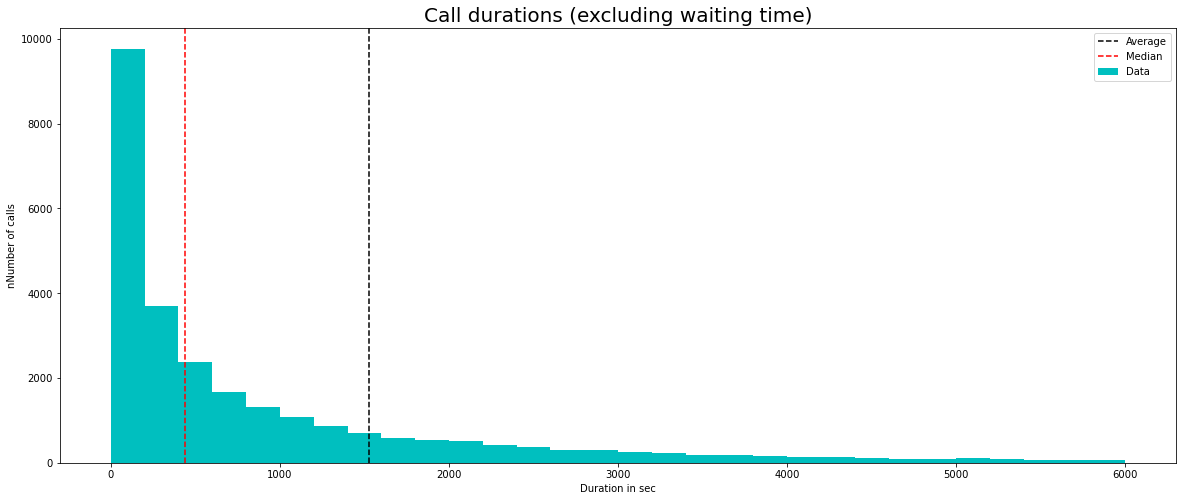

In [29]:
# Plotting call durations excluding waiting time and unanswered calls

data_calls = data_clean[data_clean['call_duration']>0] # excluds the call duration of 0 (unanswered)

plt.figure(figsize=(20,8))
plt.hist(data_calls.call_duration, color='c',bins = 30,range=(0,6000),label='Data')
plt.axvline(data_calls.call_duration.mean(), color='k', linestyle='dashed',label='Average')
plt.axvline(data_calls.call_duration.median(), color='r', linestyle='dashed',label='Median')

plt.title ('Call durations (excluding waiting time)',fontsize= 20)
plt.xlabel('Duration in sec')
plt.ylabel('nNumber of calls')
plt.legend()
plt.show()

<span style="background-color:Lavender">In this graph we can see that when it cames to call duration we have a lot of outliers, we have a long tail. The difference between the mean and median tells us that the data is left heavy, We have most of the calls that are short (shorter than the mean) but we have some very very lonf calls that push our mean to the right and make it higher.

###  Waiting time for a call
<a class="anchor" id="section_3_3"></a>

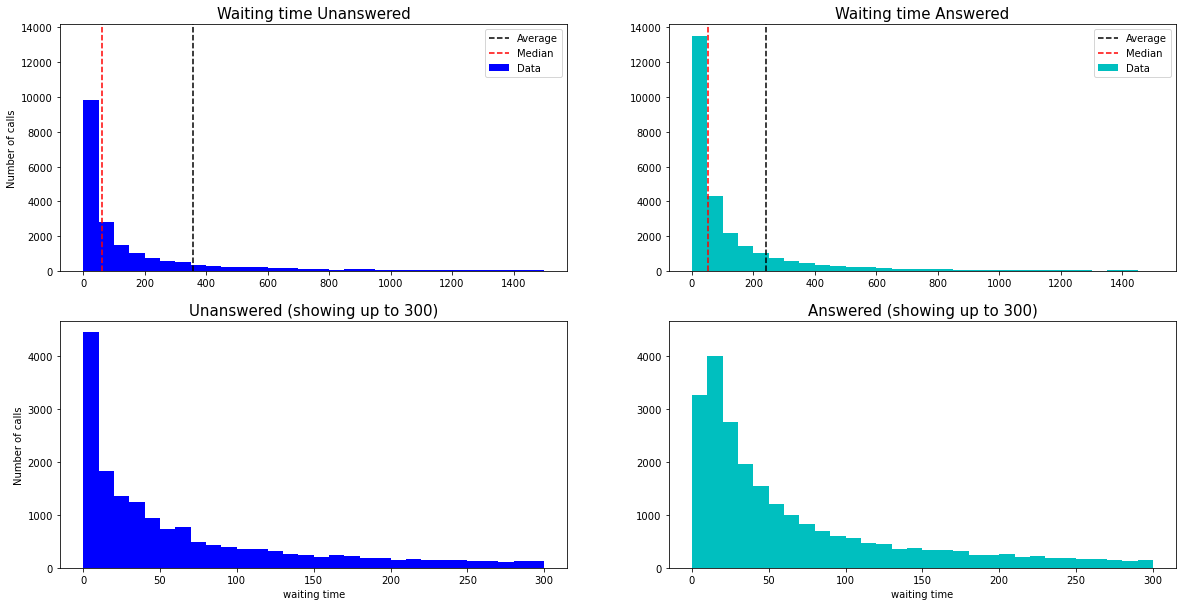

The total number of answered calls is: 27773
The total number of unanswered calls is: 21119


In [30]:
# First thing we need to add a column with the waiting time

data_merge['waiting_time']= data_merge['total_call_duration'] - data_merge['call_duration']

# Now i will plot two graphs, the waiting time for unanswered calls and the waiting time for the answered calls

data_unanswered = data_merge[data_merge['call_duration'] == 0] # data for unanswered calls

data_answered = data_merge[data_merge['call_duration'] != 0]

plt.figure(figsize = [20, 10])

# unanswered hist
ax1= plt.subplot(2, 2, 1)
plt.hist( data_unanswered.waiting_time, color='b',bins = 30,range=(0,1500),label='Data')
plt.title('Waiting time Unanswered',fontsize= 15)
plt.ylabel('Number of calls')
plt.axvline(data_unanswered.waiting_time.mean(), color='k', linestyle='dashed',label='Average')
plt.axvline(data_unanswered.waiting_time.median(), color='r', linestyle='dashed',label='Median')
plt.legend()

# unanswered hist with range
ax3= plt.subplot(2, 2, 3)
plt.hist( data_unanswered.waiting_time, color='b',bins = 30,range=(0,300),label='Data')
plt.title('Unanswered (showing up to 300)',fontsize= 15)
plt.xlabel('waiting time')
plt.ylabel('Number of calls')


# answered hist 
ax2= plt.subplot(2, 2, 2, sharey = ax1)
plt.title('Waiting time Answered',fontsize= 15)
plt.hist( data_answered.waiting_time, color='c',bins = 30,range=(0,1500),label='Data')
plt.axvline(data_answered.waiting_time.mean(), color='k', linestyle='dashed',label='Average')
plt.axvline(data_answered.waiting_time.median(), color='r', linestyle='dashed',label='Median')

plt.legend()

# answered hist with range
ax4= plt.subplot(2, 2, 4, sharey = ax3)
plt.title('Answered (showing up to 300)',fontsize= 15)
plt.xlabel('waiting time')
plt.hist( data_answered.waiting_time, color='c',bins = 30,range=(0,300),label='Data')


plt.show()

print('The total number of answered calls is: {}'.format(data_answered['calls_count'].count()))
print('The total number of unanswered calls is: {}'.format(data_unanswered['calls_count'].count()))



<span style="background-color:Lavender">We can see that for answered and unanswered calls we have a very similar median but for the unanswered calls the mean is higher which means that there are more high outliers. On a whole we can see that most calls are either answered wiithin a few minuts or the call is terminated without an answers within a few minuts. there are more answered calls within the 0-150 range after that it is more of less even between answered and un answered.

### Number of operators and answered vs unanswered calls 
<a class="anchor" id="section_3_4"></a>
<span style="background-color:Lavender">At this point we need to think again about the missing values in the 'operator_id'. Bcause there is no new information to help us fill those values I will remove them before continuing to plot graphs for answered vs. unanswered calls.

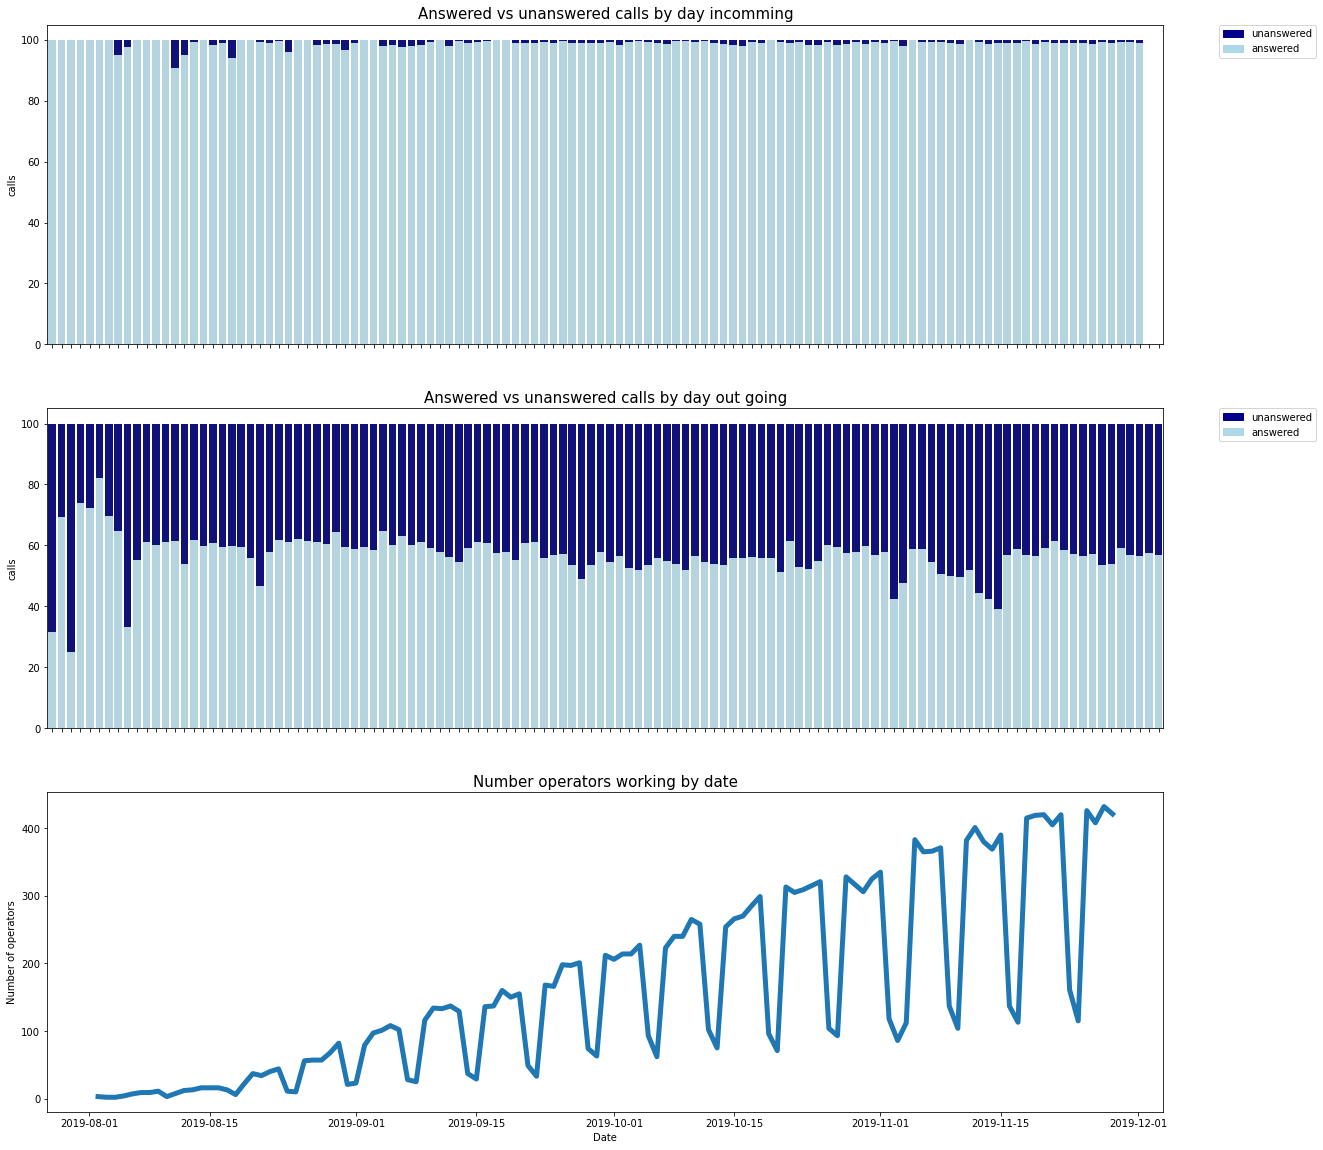

In [31]:
# removing missing values from operator_id
data_no_missing = data_merge.dropna(subset=['operator_id'])

# First we need to separate the incoming calls 
incoming = data_no_missing[data_no_missing['direction']=='in']


# preparing for % stackt bar graph incomming
total_calls = incoming.groupby(['date'])['calls_count'].sum().reset_index()
answered = incoming[incoming.is_missed_call==False].groupby(['date'])['calls_count'].sum().reset_index()
answered['calls_count']= [i / j * 100 for i,j in zip(answered['calls_count'], total_calls['calls_count'])]
total_calls['calls_count'] = [i / j * 100 for i,j in zip(total_calls['calls_count'], total_calls['calls_count'])]

# outgoing
out_going = data_no_missing[data_no_missing['direction']=='out']

# preparing for % stackt bar graph out going
total_calls_out = out_going.groupby(['date'])['calls_count'].sum().reset_index()
answered_out = out_going[out_going.is_missed_call==False].groupby(['date'])['calls_count'].sum().reset_index()

answered_out['calls_count']= [i / j * 100 for i,j in zip(answered_out['calls_count'],
                                                         total_calls_out['calls_count'])]

total_calls_out['calls_count'] = [i / j * 100 for i,j in zip(total_calls_out['calls_count'],
                                                             total_calls_out['calls_count'])]

# grouping 
operators_grouped = data_no_missing.groupby(['date'],as_index=False).agg({'operator_id':'nunique'})

# Plotting answered vs u nanswered incomming
plt.figure(figsize=(20,20))
ax1= plt.subplot(3,1,1)

# bar chart 1 -> top bars (group of 'unanswered')
bar1 = sns.barplot(x="date",  y="calls_count", data=total_calls, color='darkblue')

# bar chart 2 -> bottom bars (group of 'answered')
bar2 = sns.barplot(x="date", y="calls_count", data=answered, color='lightblue')
ax1.set(xticklabels=[]) 

plt.title('Answered vs unanswered calls by day incomming', fontsize = 15)
plt.xlabel('')
plt.ylabel('calls')

top_bar = mpatches.Patch(color='darkblue', label='unanswered')
bottom_bar = mpatches.Patch(color='lightblue', label='answered')
plt.legend(handles=[top_bar, bottom_bar],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Plotting answered vs u nanswered out going
ax2= plt.subplot(3,1,2, sharex= ax1)
# bar chart 1 -> top bars (group of 'unanswered')
bar1 = sns.barplot(x="date",  y="calls_count", data=total_calls_out, color='darkblue')

# bar chart 2 -> bottom bars (group of 'answered')
bar2 = sns.barplot(x="date", y="calls_count", data=answered_out, color='lightblue')
ax1.set(xticklabels=[]) 

plt.title('Answered vs unanswered calls by day out going', fontsize = 15)
plt.xlabel('')
plt.ylabel('calls')

top_bar = mpatches.Patch(color='darkblue', label='unanswered')
bottom_bar = mpatches.Patch(color='lightblue', label='answered')
plt.legend(handles=[top_bar, bottom_bar],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


# plotting number of operators
ax3= plt.subplot(3,1,3)

plt.plot('date', 'operator_id', data=operators_grouped,linewidth=5)


plt.title('Number operators working by date', fontsize = 15)
plt.xlabel('Date')
plt.ylabel('Number of operators')


fmt_half_year = mdates.DayLocator(interval=7)
ax.xaxis.set_major_locator(fmt_half_year)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))


plt.show()

<span style="background-color:Lavender">The nuber of operators is increasing by the day just like the number of calls we saw earlier. thankfully the ratio of answered calls to unanswered calls stays prety much  stable throughout (except for two days in the beginning).
We can see that incomming calls are much more likely to get answered (allmost 100%) then out going calls


### The proportions of internal calls from all calls
<a class="anchor" id="section_3_5"></a>


In [32]:
internal = data_no_missing[data_no_missing['internal']==True]
external = data_no_missing[data_no_missing['internal']==False]

print('The number of internal calls is: {}'.format(internal['calls_count'].sum()))
print('The number of external calls is: {}'.format(external['calls_count'].sum()))
print('the % of external calls is: {:.2%}'.format(external['calls_count'].sum()/data_no_missing['calls_count'].sum()))


The number of internal calls is: 13665
The number of external calls is: 688420
the % of external calls is: 98.05%


<span style="background-color:Lavender">We have much more external calls that is to be expected, only about 2% of calls are internal

### The proportions of unanswered calls from internal and external calls
<a class="anchor" id="section_3_6"></a>

In [33]:
internal_missed_grouped = data_no_missing.groupby(['internal','is_missed_call']).agg({'calls_count':'sum'})

internal_missed_grouped_percent = internal_missed_grouped.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))

internal_missed_grouped_percent

calls_count
internal is_missed_call             
False    False             61.175590
         True              38.824410
True     False             63.095499
         True              36.904501

<span style="background-color:Lavender">We can see that internal calls have a bit less % of missed calls but the difference is 2% and is not high at all.

### Calls by user, average number of calls and average duration
<a class="anchor" id="section_3_7"></a>

In [34]:
user_calls = data_clean.groupby(['user_id','date'],as_index =False).agg({'calls_count':'sum','total_call_duration':'mean','call_duration':'mean'})
print('Average number of daily calls per user is: {:.2f}'.format(user_calls['calls_count'].mean()))
print('Average daily total call duration per user is: {:.2f}'.format(user_calls['total_call_duration'].mean()))
print('Average daily call duration per user is: {:.2f}'.format(user_calls['call_duration'].mean()))


Average number of daily calls per user is: 77.64
Average daily total call duration per user is: 651.50
Average daily call duration per user is: 490.73


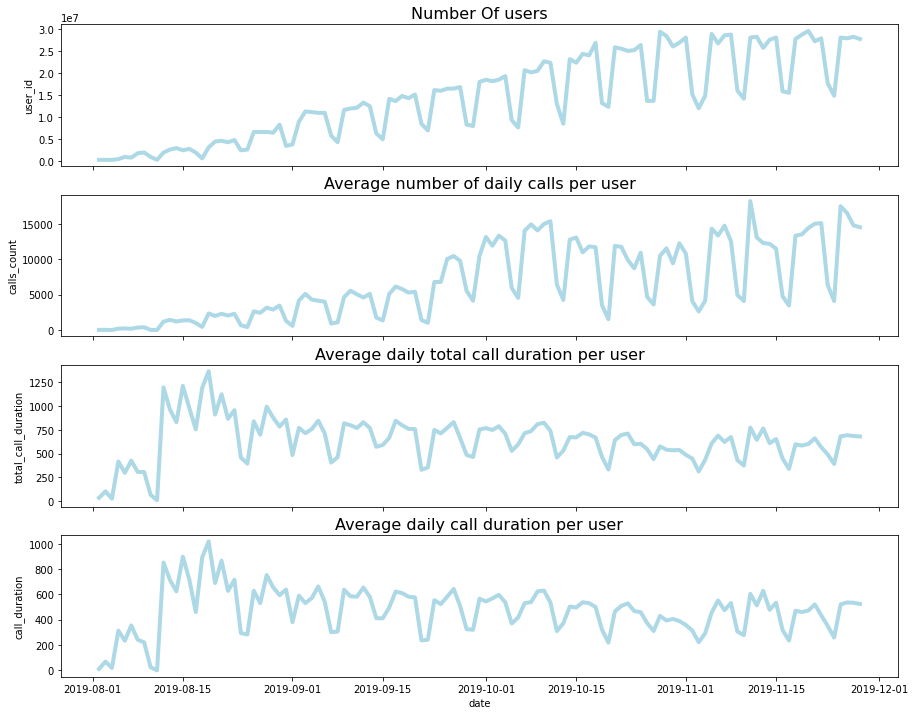

In [35]:
user_calls_date = user_calls.groupby(['date'],as_index=False).agg(
    {'calls_count':'sum','total_call_duration':'mean','call_duration':'mean','user_id':'sum'})


# plotting

# list of columns to plot
column_list = ('user_id','calls_count','total_call_duration','call_duration')
graph_name =  ('Number Of users','Average number of daily calls per user',
               'Average daily total call duration per user',
               'Average daily call duration per user'
              )

x= fig, axes = plt.subplots(4, 1, figsize=(15,12), sharex=True)

for ind,val in enumerate(column_list):
    sns.lineplot(data= user_calls_date,x= 'date',y= val,linewidth='4',
                 ax=axes[ind],color='lightblue').set_title(graph_name[ind],fontsize=16)
    
  
 
plt.show()

We can see that users and number of calls per user are going up. The call duration is starting to stable after a cheotic start

### Cheking to see if the users plan changes the number of calls, duration, waiting time
<a class="anchor" id="section_3_8"></a>

In [36]:
clients['tariff_plan'].value_counts()

C    395
B    261
A     76
Name: tariff_plan, dtype: int64

In [37]:
data_no_missing.groupby(['tariff_plan']).agg({'calls_count':'mean', 'call_duration':'mean', 'waiting_time':'mean'})

,calls_count,call_duration,waiting_time
tariff_plan,,,
A,31.135184,1746.827806,629.521002
B,9.586922,716.761319,163.341674
C,12.364931,691.480521,195.978327


<span style="background-color:Lavender">Very interesting, when we look at the different tariff plans we see a big difference in waiting times, call count and duration. Tariff A has the most calls the longest calls and is waiting the longest to get an answer. Tariff B and C are closer together with the biggest difference being the number of calls, tariff B has a very low average number of calls only 9.5 that is 3 times less then a client in tariff A. Tariff A's cal duration is more then double the other tariffs.

### The average number of calls an operator has in a day 
<a class="anchor" id="section_3_9"></a>

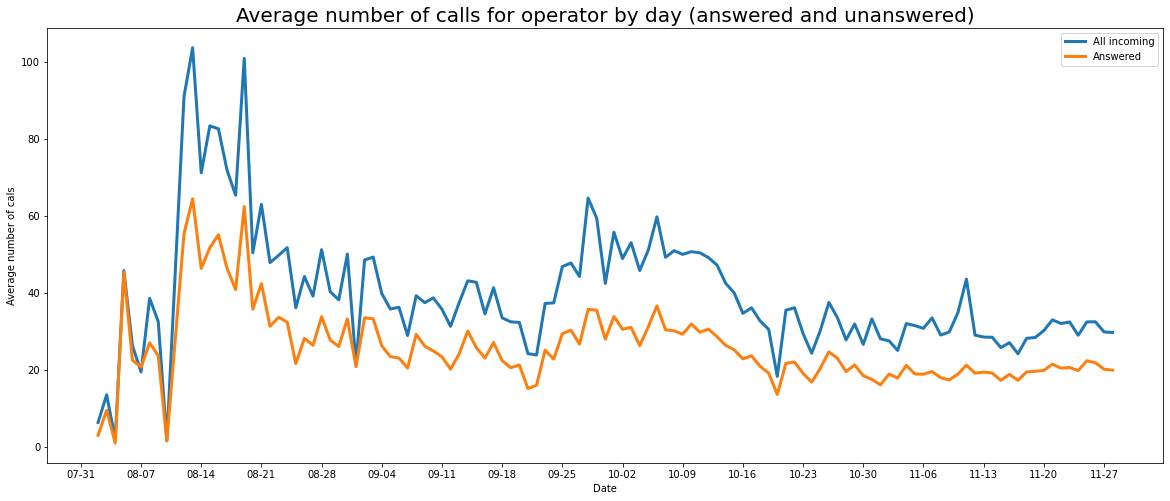

Average number of calls an operator has in a day: 35.74
Average number of answerd calls an operator has in a day: 22.76


In [38]:

# grouping all calls
operator_daily_calls = data_no_missing.groupby(['date','operator_id'],as_index=False)['calls_count'].sum()
daily_calls = operator_daily_calls.groupby(['date'],as_index=False)['calls_count'].mean()

# grouping answered calls
operator_daily_calls_answered = data_no_missing[
    data_no_missing['is_missed_call']==False].groupby(['date',
                                                          'operator_id'],
                                                      as_index=False)['calls_count'].sum()
daily_answered_calls = operator_daily_calls_answered.groupby(['date'],as_index=False)['calls_count'].mean()


fig, ax = plt.subplots(figsize=(20,8))
ax.plot('date', 'calls_count', data=daily_calls,linewidth= 3 ,label='All incoming')
ax.plot('date', 'calls_count', data=daily_answered_calls,linewidth= 3 ,label='Answered')

plt.title('Average number of calls for operator by day (answered and unanswered)', fontsize = 20)
plt.xlabel('Date')
plt.ylabel('Average number of cals')
plt.legend()
fmt_half_year = mdates.DayLocator(interval=7)
ax.xaxis.set_major_locator(fmt_half_year)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))


plt.show()

avg_calls_per_oparator = data_no_missing.groupby(['operator_id','date'])['calls_count'].sum().mean()
avg_answered_calls_per_oparator = data_no_missing[data_no_missing['is_missed_call']==False].groupby(['operator_id','date'])['calls_count'].sum().mean()
print('Average number of calls an operator has in a day: {:.2f}'.format(avg_calls_per_oparator))
print('Average number of answerd calls an operator has in a day: {:.2f}'.format(avg_answered_calls_per_oparator))


<span style="background-color:Lavender">Calls per operator are setteling slowly around the average of 35 calls per operator. in the beginning the number of calls was fluctuating much more and the number of calls an operator could get in a day was much higher.

## 4. Identifying ineffective metrics
<a class="anchor" id="chapter4"></a>

<span style="background-color:Lavender">First thing we have to decive of a minimal number of calls an operator needs to have under its belt before we can judge their preformance. We saw before that and operator has on average was settling around 35 answered calls a day, lets give 5 days of work as the time we can start to anelize the ineffective operators.

<span style="background-color:Lavender">**200 calls** will be our enrty level.

In [39]:
# Creating an  array of all operator_id
operator_id = data_no_missing['operator_id'].unique()

# grouping and then filtering only oporators with 200 answered calls
operator_200_calls = data_no_missing.groupby(['operator_id'],as_index=False)['calls_count'].sum()
operator_200_calls = operator_200_calls[operator_200_calls['calls_count']>=200]

# a list of operator id's with 200 calls
operator_200_calls_list = operator_200_calls['operator_id'].tolist()
opearators_200_boo = data_no_missing['operator_id'].isin(operator_200_calls_list)

opearators_200 = data_no_missing[opearators_200_boo]

print('operators that had more then 200 calls: {:.2%}'.format(len(operator_200_calls)/len(operator_id)))
print('That is: {}'.format(len(operator_200_calls)))


operators that had more then 200 calls: 38.10%
That is: 416


<span style="background-color:Lavender">I will write a function that outputs a boxplot of a groupby columns and quantiles

In [40]:

def box_plot(data, col,title='', quantile=[.25, .5, .75]):
    '''
    This function takes a df and a column and prints out the quantiles of the column and 
    plots a boxplot with a title 
    and optional quantiles
    '''
    print('Quantiles number of {}:'.format(col))
    print(data[col].quantile(quantile))
    
    fig, ax = plt.subplots(figsize=(15,5))
    ax= sns.boxplot(x=col, data=data)
    plt.title(title,fontsize=15)
    plt.axvline(data[col].mean(),linestyle='dashed',color='r')
    plt.show()

In [41]:
opearators_200.sample()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,day,tariff_plan,date_start,waiting_time
33819,167626,2019-10-10,out,False,919372.0,False,4,251,300,3,A,2019-09-24,49


### Unanswered calls
<a class="anchor" id="section_4_1"></a>

In [42]:
# number of incomming calls by oparator

incoming = opearators_200[opearators_200['direction']=='in']

operator_daily_in_calls = incoming.groupby(['operator_id','is_missed_call']).agg({'calls_count':'sum'})

operator_daily_in_calls_percent = operator_daily_in_calls.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum())).reset_index()

operator_daily_in_calls_percent= operator_daily_in_calls_percent[
    operator_daily_in_calls_percent['is_missed_call']==False].sort_values(by='calls_count')

# becouse we have oparators with a low number of calls, 
# we need to filter out all the 100% so this wount skew the data

operator_daily_in_calls_percent_100 = operator_daily_in_calls_percent[operator_daily_in_calls_percent['calls_count']<100]
operator_daily_in_calls_percent_100.sample(5)


,operator_id,is_missed_call,calls_count
380,948286.0,False,95.297806
317,939370.0,False,99.170124
202,919554.0,False,99.068586
209,920666.0,False,99.438202
397,954750.0,False,99.551570


Quantiles number of calls_count:
0.10    94.117647
0.25    97.700846
0.75    99.429293
Name: calls_count, dtype: float64


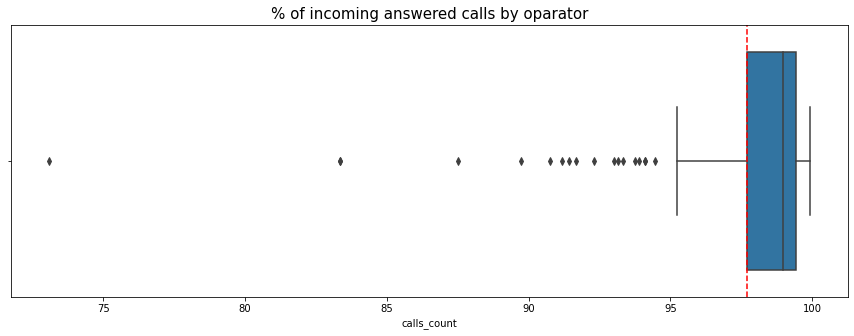

In [43]:
# printing the 25% 50% and 75& quantiles
box_plot(operator_daily_in_calls_percent_100,
         'calls_count',title='% of incoming answered calls by oparator', quantile=[.10, .25, .75])

<span style="background-color:Lavender">For % of incoming calls:

<span style="background-color:Lavender">- if a oparator has  94% or less of the incomming calls answered it will be ineffective</span>

<span style="background-color:Lavender">- If an operator has 99.4% or more answered that will be a good operator
    </span>

### Incoming call waiting time
<a class="anchor" id="section_4_2"></a>

Quantiles number of waiting_time:
0.25     22.0
0.50     57.0
0.75    145.0
Name: waiting_time, dtype: float64


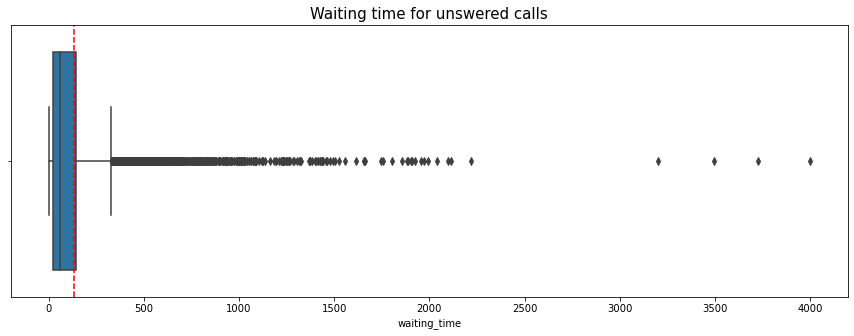

Average waiting time for incomming call is: 131.31


In [44]:
# we will first filter out in unanswered calls 

incoming_answered = incoming[incoming['is_missed_call']==False]

box_plot(incoming_answered, 'waiting_time','Waiting time for unswered calls')
print('Average waiting time for incomming call is: {:.2f}'.format(incoming_answered['waiting_time'].mean()))


<span style="background-color:Lavender">We have many outliers in the data, we need to determine the point at which we filter out the outliers. Looking at the boxplot I belive we can put the max at 500 and go on from there

Quantiles number of waiting_time:
0.25     20.0
0.50     52.0
0.75    121.0
Name: waiting_time, dtype: float64


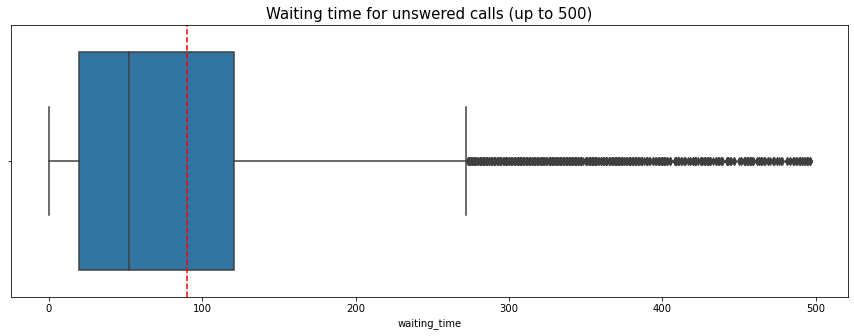

In [45]:
incoming_answered_250 = incoming_answered[incoming_answered['waiting_time']<500]

box_plot(incoming_answered_250, 'waiting_time','Waiting time for unswered calls (up to 500)')

<span style="background-color:Lavender">Now its much better,


<span style="background-color:Lavender">- inefficient operators have an **waiting time of 121 and up** 

<span style="background-color:Lavender">- And efficiant ones have an **20 or less**



<span style="background-color:Lavender">Now we need to see how many calls each oparator has with a long waiting time.

Quantiles number of calls_count:
0.25    20.021056
0.50    54.340718
0.75    87.105039
Name: calls_count, dtype: float64


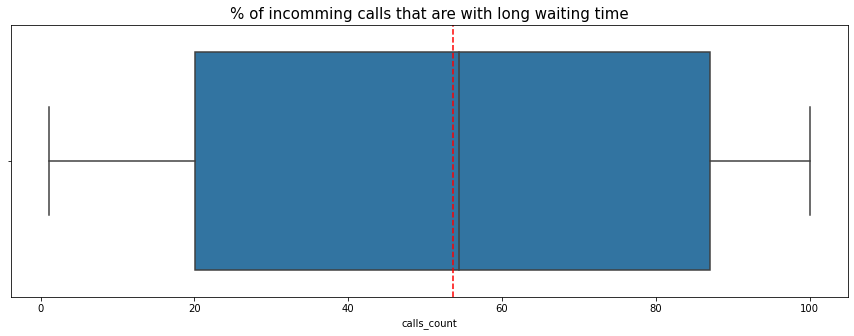

In [46]:
# adding a column for long waiting times
incoming_answered['long_wait'] = incoming_answered['waiting_time'].apply(lambda x:True  if x>= 121 else  False)

# grouping 
incoming_grouped = incoming_answered.groupby(['operator_id','long_wait']).agg({'calls_count':'sum'})

# turning column into % from same group (% long waiting time to long waiting)
incoming_grouped = incoming_grouped.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum())).reset_index()
# Filtering only long wait 
incoming_grouped = incoming_grouped[incoming_grouped['long_wait']== True].sort_values(by='calls_count')


box_plot(incoming_grouped, 'calls_count','% of incomming calls that are with long waiting time')



### Precent of incomming calls with a long wait:
<a class="anchor" id="section_4_3"></a>
<span style="background-color:Lavender">- an inefficient operator 87% of calls with long waiting time
    
<span style="background-color:Lavender">- a good operator has 20% and under calls with long waiting time



Quantiles number of waiting_time:
0.25     28.937500
0.50     53.802033
0.75    120.218452
Name: waiting_time, dtype: float64


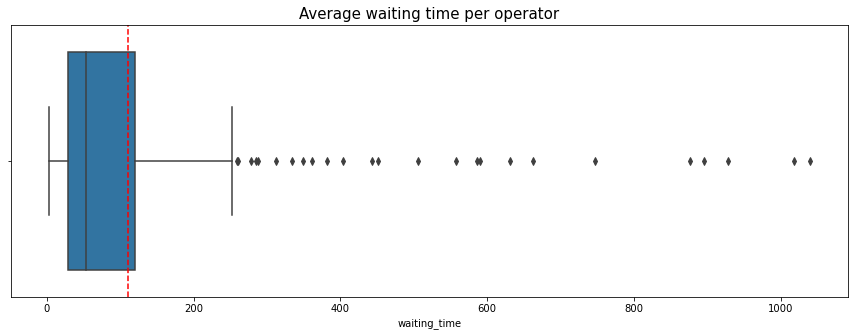

Average waiting time for operator is: 110.66


In [47]:
group = incoming_answered.groupby(['operator_id'],as_index=False)['waiting_time'].mean()

box_plot(group, 'waiting_time','Average waiting time per operator')

print('Average waiting time for operator is: {:.2f}'.format(incoming_answered.groupby(
    ['operator_id'])['waiting_time'].mean().mean()))


<span style="background-color:Lavender">the Average waiting time per operator has outliers I will filter up to 400.

Quantiles number of waiting_time:
0.25    26.348214
0.50    45.756705
0.75    84.118333
Name: waiting_time, dtype: float64


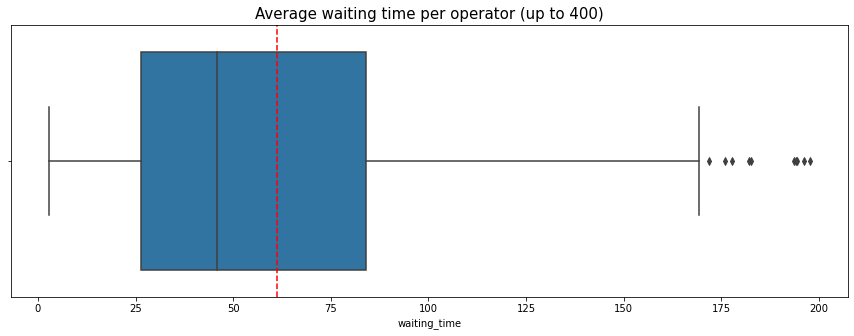

In [48]:
box_plot(group[group['waiting_time']<200], 'waiting_time','Average waiting time per operator (up to 400)')



<span style="background-color:Lavender">The average waiting time per operator:

<span style="background-color:Lavender">- an inefficient operator has 84 average waiting time

<span style="background-color:Lavender">- a good operator has 26 and under average waiting time



### Out going calls
<a class="anchor" id="section_4_5"></a>

Quantiles number of calls_count:
0.25    10.844828
0.50    29.100000
0.75    76.692857
Name: calls_count, dtype: float64


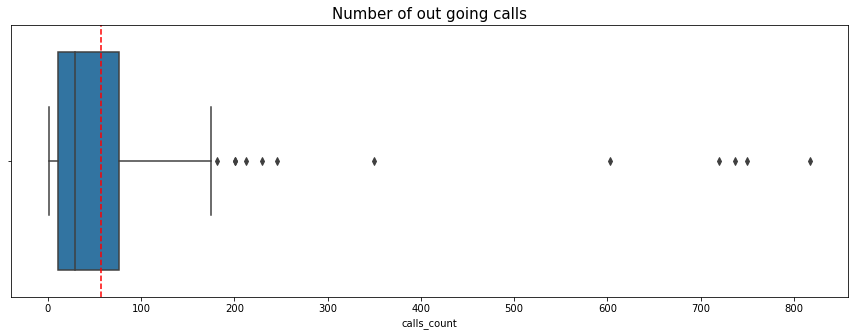

In [49]:
# df with only outgoing calls
out_going = opearators_200[opearators_200['direction']=='out']

out_grouped = out_going.groupby(['operator_id','date'],as_index=False)['calls_count'].sum()
out_grouped = out_grouped.groupby(['operator_id'],as_index=False)['calls_count'].mean()
box_plot(out_grouped,'calls_count','Number of out going calls')


<span style="background-color:Lavender">We have some outliers we need to filter out, we will filter everything above 200 

Quantiles number of calls_count:
0.25    10.382212
0.50    28.270996
0.75    68.576316
Name: calls_count, dtype: float64


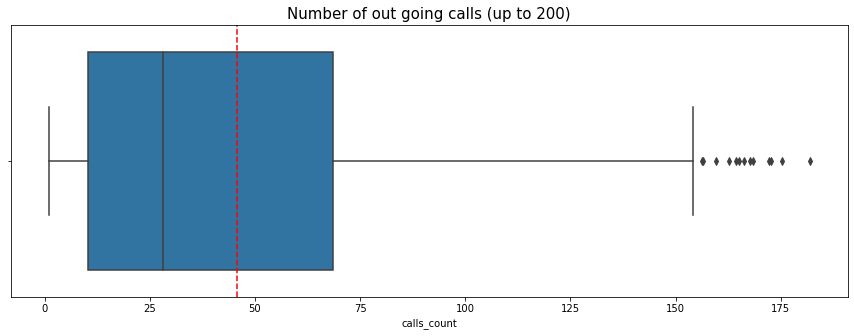

In [50]:
box_plot(out_grouped[out_grouped['calls_count']<200],'calls_count','Number of out going calls (up to 200)')

<span style="background-color:Lavender">This is better
<span style="background-color:Lavender">- we can say that an ineffective operator is one with 12 or less avd daily outgoing calls 

<span style="background-color:Lavender">- Good operators are ones with 80 or more average daily out-going calls

### ineffective qualities conclution

We have identified 5 qualities that make up the score of an ineffective operator:

1. **% of answered calls:**
    - if a oparator has 96% or less of the incomming calls answered it will be ineffective
    - If an operator has 100% or more answered that will be a good operator.
    
1. **Waiting time for answered calls:**
    - inefficient operators have a average waiting time of 121 and up
    - efficiant ones have average 20 or less
1. **% of incomming calls with a long wait (long wait > 121):**
    - inefficient operator 87% of calls are with a long waiting time
    - a good operator has 20% and under calls with long waiting time 
1. **The average waiting time per operator (incoming):**
    - an inefficient operator has 84 average and up waiting time
    - a good operator has 26 average and under waiting time
1. **Number of out going calls:**
    - we can say that an ineffective operator is one with 12 or less average daily outgoing calls 
    - Good operators are ones with 80 or more average daily out-going calls
    


## 5. Adding efficiency score columns 
<a class="anchor" id="chapter5"></a>

<span style="background-color:Lavender">First thing I'll write a function that takes a list of operator ids and gives back a df with the 5 qualities for each operator.

In [51]:
# Writing function to add score columns

def operator_score_df(df, operator_id):
    '''
    This function will take
    a data frame 
    an operator_id list
    and returns a data frame with the score metrict for each oparetore id
    
    '''
    
    new_df = pd.DataFrame(columns=['operator_id', 'first_date', 'last_date', 'calls_sum', 'calls_out_daily_avg',
                                  'calls_incoming_daily_avg', '%_answered_calls',
                                   '%_incoming_long_wait','avg_waiting_time',
                                   'score_%_answered', 'score_waiting_time',
                                   'score_%_long_wait','score_avg_wait','score_out_going','score'])
    
    for op in operator_id:
        
        op_df = pd.DataFrame(
            {
            'operator_id': None,
            'first_date': None,
            'last_date': None,
            'calls_sum': None,
            'calls_out_daily_avg': None,
            'calls_incoming_daily_avg': None,
            '%_answered_calls': None,
            '%_incoming_long_wait': None,
            'avg_waiting_time': None
            }, index=[0])

        # id
        op_df['operator_id']= op  

        # df with only operators data
        operator_df = df[df['operator_id']== op]



        first_date = operator_df['date'].min() # first date
        op_df['first_date']= first_date

        last_date = operator_df['date'].max()  # last date
        op_df['last_date']= last_date

        calls_sum = operator_df['calls_count'].sum()  # number of all calls
        op_df['calls_sum']= calls_sum

        operator_out_calls = operator_df[operator_df['direction']=='out']   # out going calls 
        calls_out_sum = operator_out_calls['calls_count'].sum()
        

        operator_in_calls = operator_df[operator_df['direction']=='in']  # incoming calls
        calls_incoming_sum = operator_in_calls['calls_count'].sum()
        
 

        if calls_incoming_sum > 0:  # only if there are incoming calls

            # % of answered calls
            call_in_daily_avg = operator_in_calls.groupby(['date'],as_index=False)['calls_count'].sum()
            op_df['calls_incoming_daily_avg'] = call_in_daily_avg['calls_count'].mean()
            
            operator_call_count = operator_in_calls['calls_count'].sum()
            operator_calls_answered = operator_in_calls[operator_in_calls['is_missed_call']==False]
            operator_calls_answered_sum = operator_in_calls[
                operator_in_calls['is_missed_call']==False]['calls_count'].sum()

            op_df['%_answered_calls'] = operator_calls_answered_sum/operator_call_count


            # % of incomming calls with a long wait:
            pcent_long_wait = operator_calls_answered[operator_calls_answered['waiting_time']>=76]
            number_of_long_waits = pcent_long_wait['calls_count'].sum()
            op_df['%_incoming_long_wait'] = number_of_long_waits/operator_calls_answered_sum


            avg_waiting_time = operator_calls_answered['waiting_time'].mean() # waiting time for answered calls
            op_df['avg_waiting_time'] = avg_waiting_time
        
        # Score unanswered
        if (op_df['%_answered_calls'] <= 0.96).all():
            op_df['score_%_answered'] = -1
        elif (op_df['%_answered_calls'] <= 1).all():
            op_df['score_%_answered'] = 1
        else:
            op_df['score_%_answered'] = 0
            
        # Score waiting time 
        if (op_df['avg_waiting_time']>= 121).all():
            op_df['score_waiting_time'] = -1
        elif (op_df['avg_waiting_time']<= 20).all():
            op_df['score_waiting_time'] = 1
        else:
            op_df['score_waiting_time'] = 0
            
        # Score % long wait
        if (op_df['%_incoming_long_wait']>= 0.87).all():
            op_df['score_%_long_wait'] =-1
        elif (op_df['%_incoming_long_wait']>= 0.20).all():
            op_df['score_%_long_wait'] = 1
        else:
            op_df['score_%_long_wait'] = 0
            
         # Score avg wait
        if (op_df['avg_waiting_time']>= 84).all():
            op_df['score_avg_wait'] = -1
        elif (op_df['avg_waiting_time']<= 26).all():
            op_df['score_avg_wait'] = 1
        else:
            op_df['score_avg_wait'] = 0
            
        # calls out score   
        if calls_out_sum != 0:  
            calls_out_daily = operator_out_calls.groupby(['date'],as_index=False)['calls_count'].sum()
            calls_out_daily_avg = calls_out_daily['calls_count'].mean()
            op_df['calls_out_daily_avg'] = calls_out_daily_avg
        else:
            op_df['calls_out_daily_avg'] = 0
            
        if (op_df['calls_out_daily_avg'] <=12).all() and (op_df['calls_out_daily_avg'] >0).all(): 
            op_df['score_out_going'] = -1
            
        elif (op_df['calls_out_daily_avg'] >=80).all(): 
            op_df['score_out_going'] = 1
        elif (op_df['calls_out_daily_avg']==0).all(): 
            op_df['score_out_going'] = 0   
        else:
            op_df['score_out_going'] = 0    
        
        op_df['score'] = op_df[
            'score_%_answered'] + op_df[
            'score_waiting_time']+ op_df[
            'score_%_long_wait']+op_df[
            'score_avg_wait']+op_df[
            'score_out_going'
        ]
            
            
        new_df = new_df.append(op_df, ignore_index = True)
        
       
        
        
        
    return new_df


In [52]:
oparetore_score= operator_score_df(data_no_missing, operator_200_calls_list)   

oparetore_score.head(5)

,operator_id,first_date,last_date,calls_sum,calls_out_daily_avg,calls_incoming_daily_avg,%_answered_calls,%_incoming_long_wait,avg_waiting_time,score_%_answered,score_waiting_time,score_%_long_wait,score_avg_wait,score_out_going,score
0,879896.0,2019-08-02,2019-11-25,930,17.795918,2.7619,1,0.344828,27.3333,1,0,1,0,0,2
1,879898.0,2019-08-02,2019-11-28,7312,87.914634,1.83929,1,0.0970874,29.875,1,0,0,0,1,2
2,880026.0,2019-08-07,2019-11-28,2232,28.675325,1.33333,1,0,7.94444,1,1,0,1,0,3
3,880028.0,2019-08-07,2019-11-28,2560,32.012821,1.53659,1,0,8.36585,1,1,0,1,0,3
4,882684.0,2019-08-06,2019-10-29,1274,11.396552,13.3261,0.993475,0.962233,205.652,1,-1,-1,-1,-1,-3


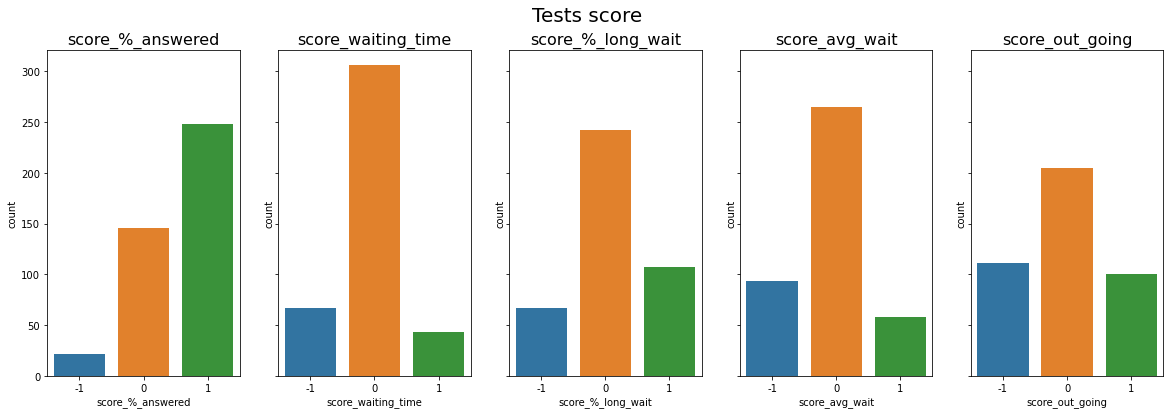

In [53]:
# plotting

# list of columns to plot
column_list = ('score_%_answered','score_waiting_time','score_%_long_wait','score_avg_wait','score_out_going')


x= fig, axes = plt.subplots(1, 5, figsize=(20,6),sharey= True)
fig.suptitle('Tests score', fontsize=20)

for ind,val in enumerate(column_list):
    sns.countplot(oparetore_score[val],ax=axes[ind]).set_title(val,fontsize=16)
    
    
plt.show()

In these 5 graphs we can see the count of operatores with that score for each of the tests.
the score is :
- Inefficient: -1

- Normal: 0

- Excellent: 1

except for the 'score_%_answered' that has a higher number of '1' score and very low '-1' score, in all other tests '0' has the highest count. 

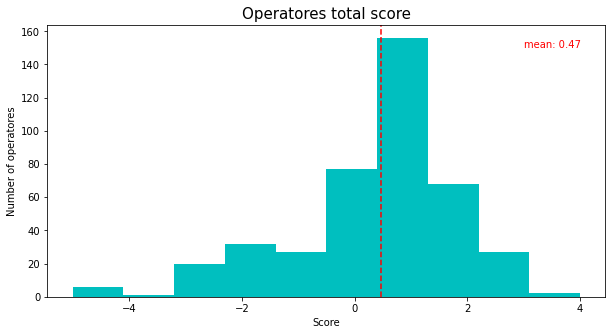

In [54]:
Counter(oparetore_score['score_%_answered'])

plt.figure(figsize=(10,5))
plt.hist(oparetore_score['score'],color='c')
plt.title('Operatores total score',fontsize=15)
plt.axvline(oparetore_score['score'].mean(),linestyle='dashed',color='r')
plt.xlabel('Score')
plt.ylabel('Number of operatores')
plt.text(3,150,'mean: {:.2f}'.format(oparetore_score['score'].mean()),color='r')
plt.show()


<span style="background-color:Lavender">After applying the function to our list of operatores we can see that the mean score is 0.47.
I think we can say that an operator with a score of under 0 is ineffective, this number can change according to the needs.

In [55]:
print('number of ineffective operators: {}'.format(len(oparetore_score[oparetore_score['score']<0])))
print('That is {:.2%}'.format(len(oparetore_score[oparetore_score['score']<0])/len(operator_200_calls)))

number of ineffective operators: 86
That is 20.67%


<span style="background-color:Lavender">We identified 86 ineffective operators (20.67% of all operators that had at least 200 calls)

In [56]:
oparetore_score[oparetore_score['score']==-5] # worst scoring operators

,operator_id,first_date,last_date,calls_sum,calls_out_daily_avg,calls_incoming_daily_avg,%_answered_calls,%_incoming_long_wait,avg_waiting_time,score_%_answered,score_waiting_time,score_%_long_wait,score_avg_wait,score_out_going,score
321,944216.0,2019-10-24,2019-11-28,367,4.750000,6.5,0.897436,0.97619,201.629,-1,-1,-1,-1,-1,-5
322,944218.0,2019-10-23,2019-11-28,409,5.857143,6.62162,0.938776,0.952174,223.378,-1,-1,-1,-1,-1,-5
323,944220.0,2019-10-23,2019-11-28,484,6.314286,7.10811,0.931559,0.991837,233.243,-1,-1,-1,-1,-1,-5
324,944222.0,2019-10-24,2019-11-28,528,11.466667,5.57576,0.907609,0.934132,169.303,-1,-1,-1,-1,-1,-5
325,944226.0,2019-10-23,2019-11-28,289,4.360000,5,0.833333,0.913333,171.889,-1,-1,-1,-1,-1,-5
380,951508.0,2019-11-01,2019-11-28,482,7.684211,17.6842,0.9375,0.977778,259.087,-1,-1,-1,-1,-1,-5


In [57]:
oparetore_score[oparetore_score['score']==4] # best scoring operators

,operator_id,first_date,last_date,calls_sum,calls_out_daily_avg,calls_incoming_daily_avg,%_answered_calls,%_incoming_long_wait,avg_waiting_time,score_%_answered,score_waiting_time,score_%_long_wait,score_avg_wait,score_out_going,score
307,940596.0,2019-10-22,2019-11-26,407,81.2,1,1,0,4,1,1,0,1,1,4
319,941390.0,2019-10-21,2019-10-25,370,123.0,1,1,0,5,1,1,0,1,1,4


## 6. Testing the hypothesis
<a class="anchor" id="chapter6"></a>

<span style="background-color:Lavender">For the hypothesis i'll check weather the length of time working changes the efficiency score.

<span style="background-color:Lavender">I'll take (from the 416 oparetors that have more them 200 calls) the 150 that work the longest time vs. the 150 with the shortest time and see if their grade is different.

In [58]:
# changing the columns to date time
oparetore_score['first_date']= pd.to_datetime(oparetore_score['first_date'])
oparetore_score['last_date']= pd.to_datetime(oparetore_score['last_date'])
oparetore_score['work_time'] = oparetore_score['last_date'] - oparetore_score['first_date']
oparetore_score = oparetore_score.sort_values(by='work_time',ascending=False)
long_workers = oparetore_score.head(150) # 150 first rows longest time workin
short_workers = oparetore_score.tail(150) # 150 last rows
print('Long')
print(long_workers.describe(),'\n')
print('Short')
print(short_workers.describe(),'\n')

print('Long time workers avg score: {:.2f}'.format(long_workers['score'].mean()))
print('short time workers avg score: {:.2f}'.format(short_workers['score'].mean()))

Long
         operator_id  calls_out_daily_avg                work_time
count     150.000000           150.000000                      150
mean   904393.106667            27.414314         78 days 20:09:36
std     12762.734492            77.665601  16 days 16:32:49.114883
min    879896.000000             0.000000         52 days 00:00:00
25%    891998.000000             5.306459         63 days 00:00:00
50%    905553.000000            12.852381         78 days 00:00:00
75%    914191.500000            27.706863         90 days 00:00:00
max    929424.000000           737.212500        118 days 00:00:00 

Short
         operator_id  calls_out_daily_avg               work_time
count     150.000000           150.000000                     150
mean   934925.720000            79.110078        19 days 03:50:24
std     19105.497031            80.343687  6 days 21:50:11.122812
min    896382.000000             0.000000         3 days 00:00:00
25%    919370.500000            29.375000        16 da

We have two groups of 150 operators each all with more then 200 calls.
- Group_A: 52-118 days working
- Group_B: 3-31 days working

Our **H0**: the mean score for the groups is the same.

the **H1**: the mean score for the groups is different.

In [59]:
# apply the Leven's test to check variance equality

alpha = .05 # we have enough samples for critical statistical significance level

results = st.ttest_ind(
    long_workers['score'],
    short_workers['score'],equal_var = False)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 


p-value:  0.3019855109836871
We can't reject the null hypothesis


<span style="background-color:Lavender">We cant reject the Null hypothesis that the avg score is the same. 

<span style="background-color:Lavender">we cant say thaqt Newer operators on average score different then an exrerienced operators, there is not a significant difference.

<span style="background-color:Lavender">This is actually good for us because this makes our efficiency score more reliable.

## 7. Conclution
<a class="anchor" id="chapter7"></a>

We looked at operators and their efficiency and saw that the number of calls and number of operators is in a quick rise but the ratio of answerred to unanswered calls stayed steady. the average number of daily calls per operators was setteling at around 35 calls per operator.

We identified 5 main metrict that will give us the final efficiency score  and wrote a function to calculate the score of each operator, we ended up identifing 86 inefficient operastors that had a low score, this is 20.6% of all operators. 

In the last part we checked the hypothesis to see if the time an operator works changes their score. We saw that we cant conclude that the score of newer operators is different that ones that have been working for a longer time, this is great because it makes our efficiency test more reliability.

The company had a cheotic start, a quickly rising number of calls to take care of, a high number of calls for every operator in the first weeks with days that peaked at more then 3X the daily overall average. The data shows that things started to settle around 2 months in, October is when we see the daily averages starting to settle on their final figures.
..
Average number of daily calls per user is: 77.64

Average number of calls an operator had in a day: 35.74

Average number of **answerd** calls an operator has in a day: 22.76

The median time for an unanswered call is around 60, this means that half the people hang up if after 60 seconds there is no answer

For the different terrif plans, terrif A has by far the highest number of calls (3X) but also the longest calls and waiting time. this is the most active terrif but the smalest with around a 6th of the total number of users.

All and all the company seems to grow in a healthy manner all metrics are stabling and the number of users still has an upward inertia and new users are still joining.


## 8. Documentation
<a class="anchor" id="chapter8"></a>


Documantation
1. working with timezones and time fixedoffset: https://www.kite.com/python/docs/pytz.FixedOffset 
2. Droping duplicates but keeping the one without null: https://stackoverflow.com/questions/56852581/how-to-drop-duplicates-but-keep-the-rows-if-a-particular-other-column-is-not-nul
3. Stacks % sns barplot : https://www.python-graph-gallery.com/stacked-and-percent-stacked-barplot
